In [2]:
import os
os.listdir('/home/ashari/Documents/Dicoding/Machine Learning Pemula')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [5]:
#ubah nama kolom
df = df.rename(columns={'Gender':'gender', 'Age': 'age', 'Annual Income (k$)': 'annual_income',
                       'Spending Score (1-100)': 'spending_score'})
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
df.drop('CustomerID', axis=1, inplace=True)
df.head(3)

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [14]:
from sklearn.cluster import KMeans

In [18]:
clusters = []
for i in range(1,30):
  km = KMeans(n_clusters=i).fit(df)
  clusters.append(km.inertia_)

Text(0, 0.5, 'Inertia')

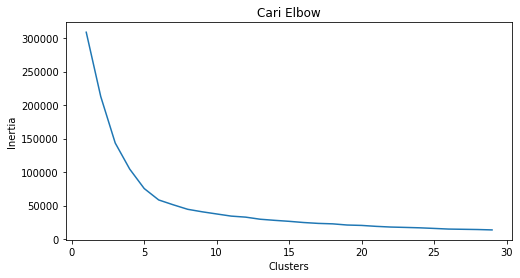

In [19]:
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 30)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [22]:
#mebuat objek KMeans
km5 = KMeans(n_cluster=5).fit(df)
df['Labels'] = km5.labels_

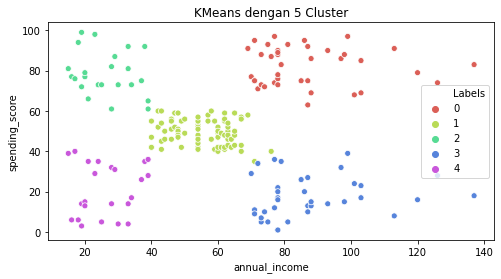

In [32]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(df)
# menambahkan kolom label pada dataset
df['Labels'] = km5.labels_
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(df['annual_income'], df['spending_score'], hue=df['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()